<a href="https://colab.research.google.com/github/rg-smith/remote_sensing_course/blob/main/SNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This example demonstrates the principle of signal to noise. The signal to noise ratio (SNR) is exactly as it sounds: the signal, or useful date, divided by the noise. Noise is typically assumed to be random and uniform, so if we average it over time or space, it goes to 0. In this example, we add noise to an image of a football field, then do some spatial averaging to reduce the noise. The end result is a lower resolution image that has less noise. This is a common problem in remote sensing. If we have low energy, or high noise, the SNR is low, and we need to spatially average to increase SNR, thus reducing resolution.

Get files from github page. This line only has to be run once

In [1]:
!git clone https://github.com/rg-smith/remote_sensing_course.git

Cloning into 'remote_sensing_course'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 59 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (59/59), done.


Load packages that we will be using

In [2]:
import matplotlib.image as img
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

Load original image

In [3]:
field=img.imread('remote_sensing_course/football_field.jpg',format='JPG')
field=field[1::2,1::2,:] # reduce image size by half to speed up computations

Make function to add noise to the raster

In [4]:
def add_noise(raster,standard_deviation):
  noise=np.random.normal(0,standard_deviation,raster.shape)
  shift=np.max(raster)/2
  raster=raster-shift # shift the raster so it's centered at 0
  raster=raster+noise # add noise to the raster
  raster=raster+shift # shift the raster back to original
  raster=raster-np.min(raster);raster=raster/np.max(raster) # scale raster from 0 to 1
  return(raster)


Add noise to the image (normal distribution)

In [5]:
field_noisy=add_noise(field,100)

Set default plot size

In [6]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 100

Plot the original and the noisy image

Text(0.5, 1.0, 'noisy image')

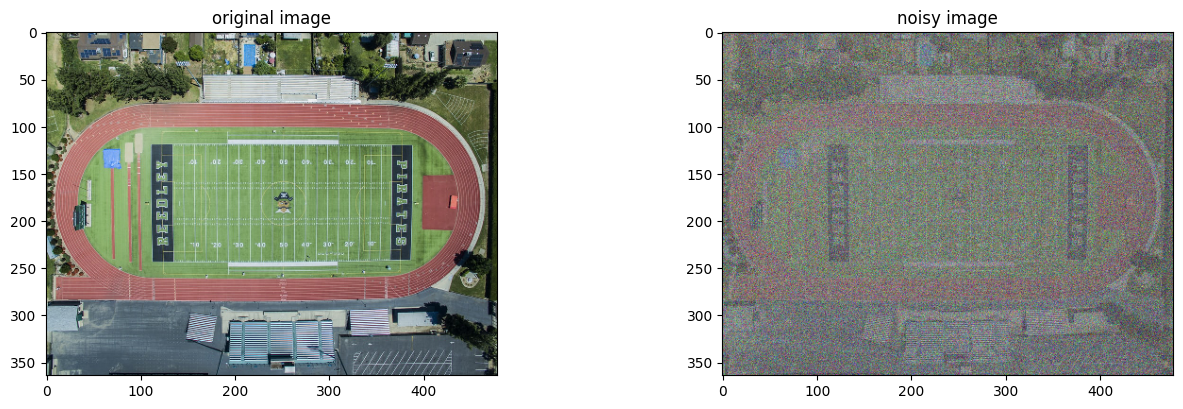

In [7]:
plt.figure();
plt.subplot(2,2,1)
plt.imshow(field);plt.title('original image')
plt.subplot(2,2,2);
plt.imshow(field_noisy);plt.title('noisy image')

Define function to average neighboring pixels

In [8]:
def multilook(raster,looks):
    for kk in range(raster.shape[2]):
        raster[:,:,kk]=ndimage.generic_filter(np.squeeze(raster[:,:,kk]), np.nanmean, size=looks, mode='constant', cval=np.NaN)
        raster[:,:,kk]=raster[:,:,kk]-np.nanmin(raster[:,:,kk])
        raster[:,:,kk]=raster[:,:,kk]/np.nanmax(raster[:,:,kk])
    #raster=raster[0::looks,0::looks,:]
    return(raster)

Average and plot the smoothed image

Text(0.5, 1.0, 'noisy image after smoothing')

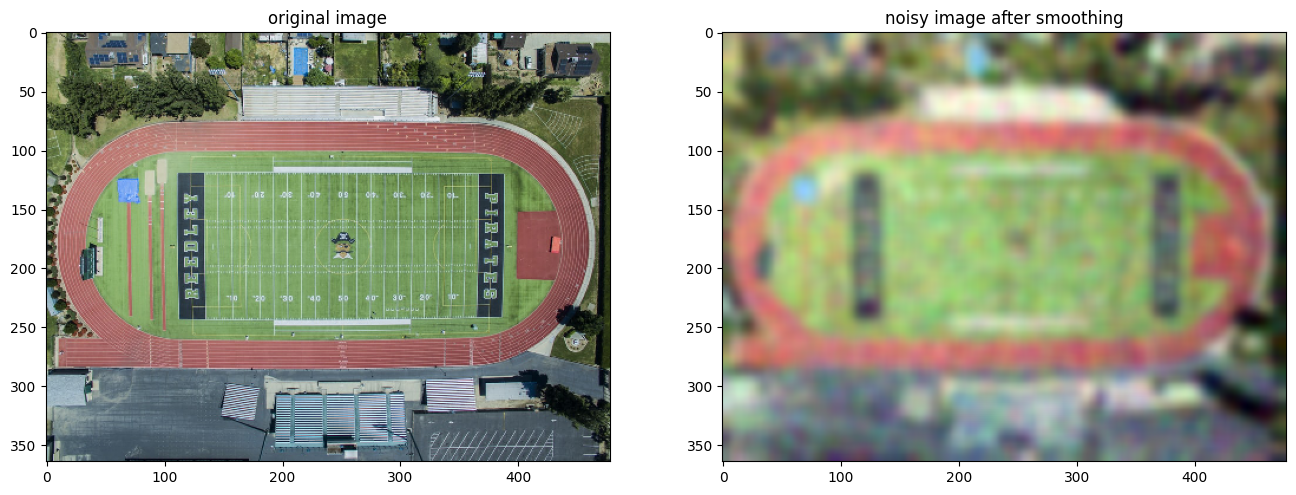

In [10]:
field_multilook=multilook(field_noisy,11)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(field);plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(field_multilook);plt.title('noisy image after smoothing')
